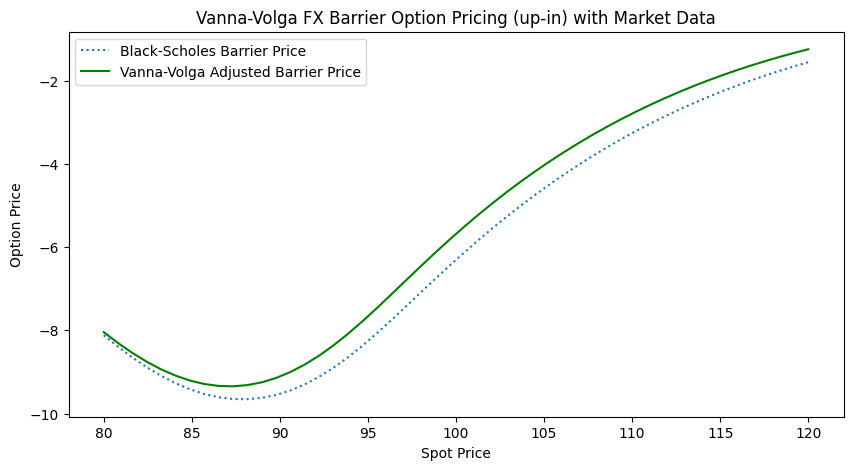

In [3]:
# Vanna-Volga Adjustment for FX Barrier Options using Market Data

import sys
sys.path.append('../src')  # Ensure src directory is accessible

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from vanna_volga_barrier_with_market import VannaVolgaBarrierMarket

# Define parameters
spot_prices = np.linspace(80, 120, 50)
strike_price = 100
time_to_maturity = 1
volatility = 0.2
domestic_rate = 0.05
foreign_rate = 0.02
barrier_level = 110
barrier_type = "up-in"
market_data_path = r"C:\Users\vagel\Desktop\Project VANA VOLGA\market_vol_data.csv"  # CSV file with market volatilities

vv_barrier_prices = []
bs_barrier_prices = []

# Compute Vanna-Volga adjusted and Black-Scholes barrier prices using market data
for S in spot_prices:
    vv_barrier_model = VannaVolgaBarrierMarket(S, strike_price, time_to_maturity, volatility, 
                                               domestic_rate, foreign_rate, barrier_level, barrier_type, 
                                               market_data_path)
    
    bs_barrier_prices.append(vv_barrier_model.calculate_barrier_price())
    vv_barrier_prices.append(vv_barrier_model.calculate_vanna_volga_barrier_price())

# Plot results
plt.figure(figsize=(10,5))
plt.plot(spot_prices, bs_barrier_prices, label="Black-Scholes Barrier Price", linestyle="dotted")
plt.plot(spot_prices, vv_barrier_prices, label="Vanna-Volga Adjusted Barrier Price", linestyle="solid", color="green")
plt.xlabel("Spot Price")
plt.ylabel("Option Price")
plt.title(f"Vanna-Volga FX Barrier Option Pricing ({barrier_type}) with Market Data")
plt.legend()
plt.show()
